In [1]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#READ DATA
bike=pd.read_csv("bikedata.csv")

In [3]:
#HAVE LOOK AT DATA
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#To check columns present in dataset
print(bike.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [5]:
#Get basic idea of data using describe()
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#checking for null values in dataset

count=bike.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
#checking for datatypes of columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#from the given data we can see that instant is an index column so we drop it
bike.drop(['instant'],axis=1,inplace=True)

In [9]:
bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [10]:
#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion

bike.drop(['dteday'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
bike.drop(['casual','registered'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
#check for datatypes
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
#from data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
#We will replace season,weekday and weathersit with appropriate values

In [14]:
bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [15]:
bike['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [16]:
bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [17]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [18]:
#changing datatypes of numerical columns to appropriate types

bike[['temp','atemp','hum','windspeed','cnt']]=bike[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [19]:
bike.head()
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [20]:
#Performing EDA

# 1)Pairplot to understand the variables

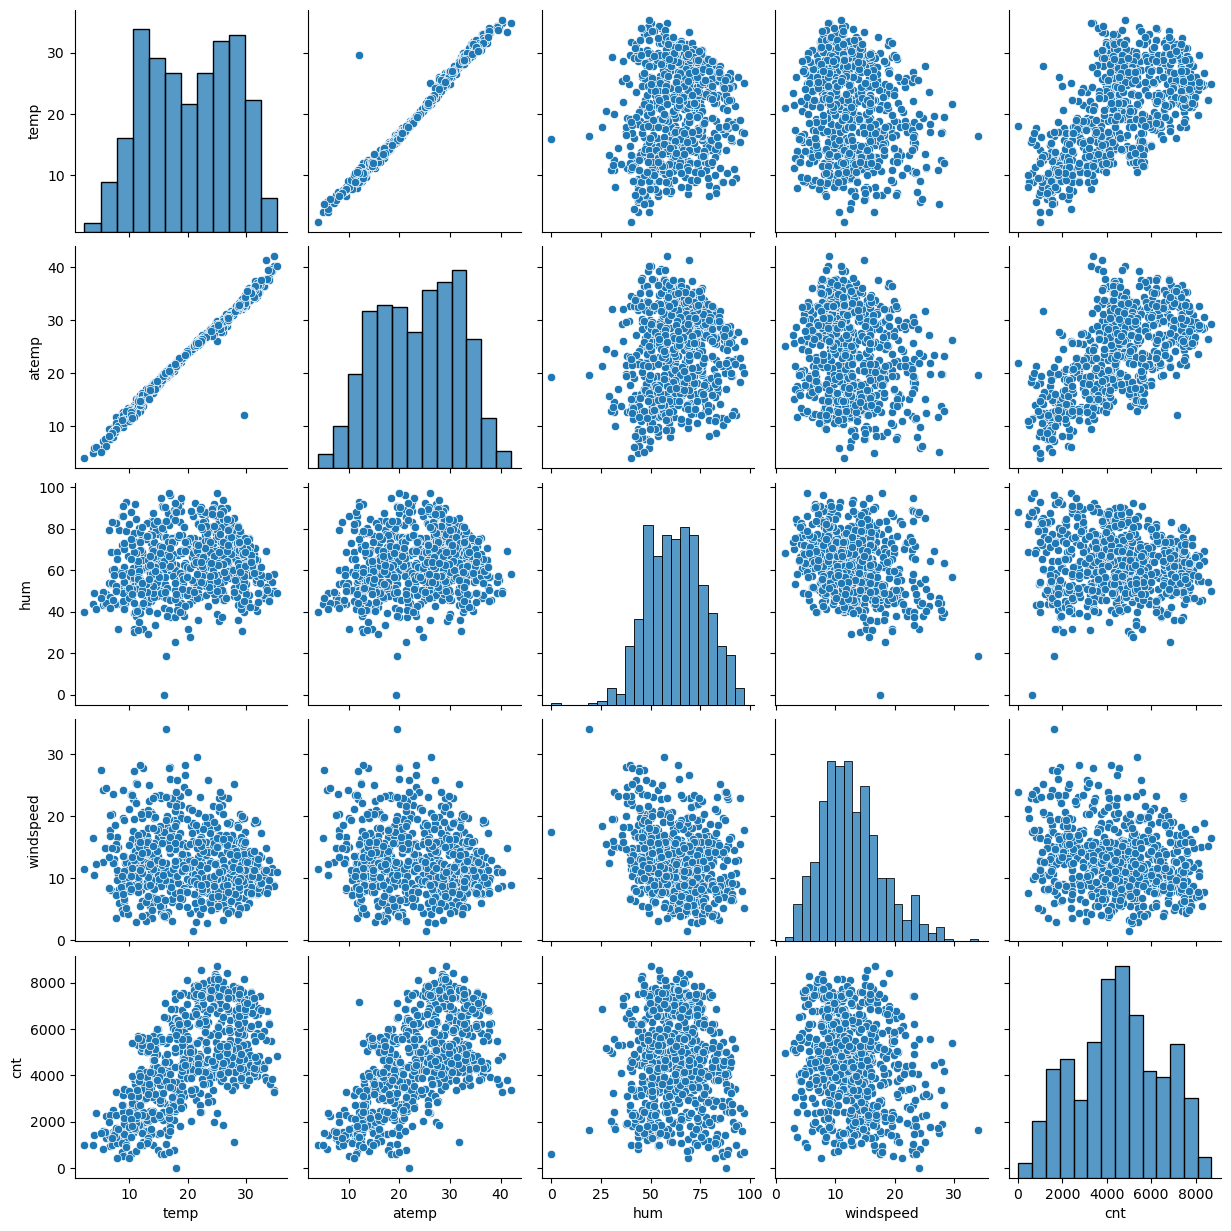

In [21]:
sns.pairplot(bike, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

Interesting correlations between the variables are displayed in the scatter plots.

- Between temp and atemp, there is a significant positive linear relationship.
- The adjusted temperature (Atemp) is the temperature that accounts for wind speed.
- The significant positive linear association between temp and atemp is expected.
- The association between cnt (count of bike rentals) and temp/atemp is somewhat positive linear.
- This suggests that on warm days, more people choose to rent bicycles.
- As a result, it appears that the weather has a big impact on how many people rent bikes.

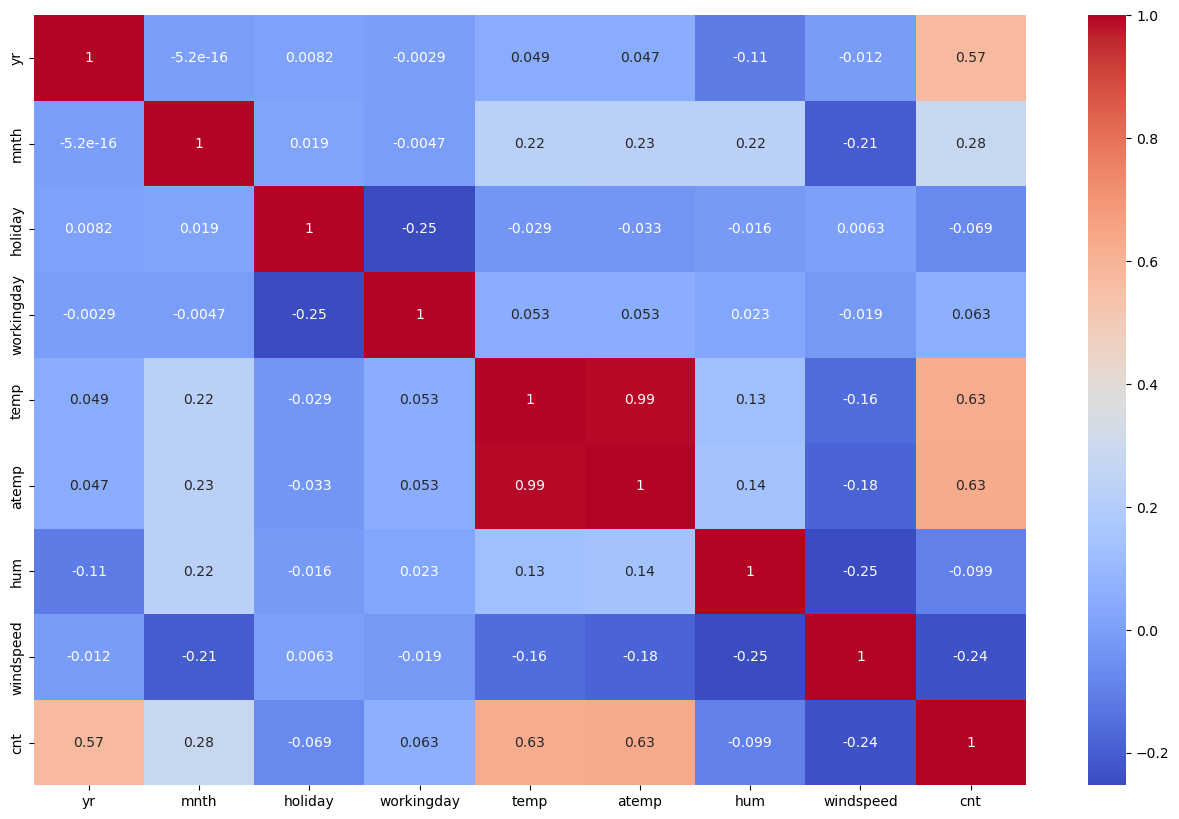

In [22]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="coolwarm")
plt.show()

The graphic is a heatmap of the dataset, where each cell's color denotes how closely two variables are correlated.

1. With a correlation coefficient of 0.99, the variables temp and atemp are the most closely associated. The associated cell's vivid red color serves as an indication of this.

2. Cnt and temp/atemp, registered/casual, and temp/atemp and casual/registered are some more pairs that are significantly associated.

3. The blue color in the adjacent cell indicates a moderately unfavorable link between humidity and bike rentals. This shows that on days with high humidity, fewer people are likely to rent bicycles.

4. The predominantly white cells suggest that the windspeed variable is not substantially associated with any of the other factors.

In [23]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp

bike.drop(['temp'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


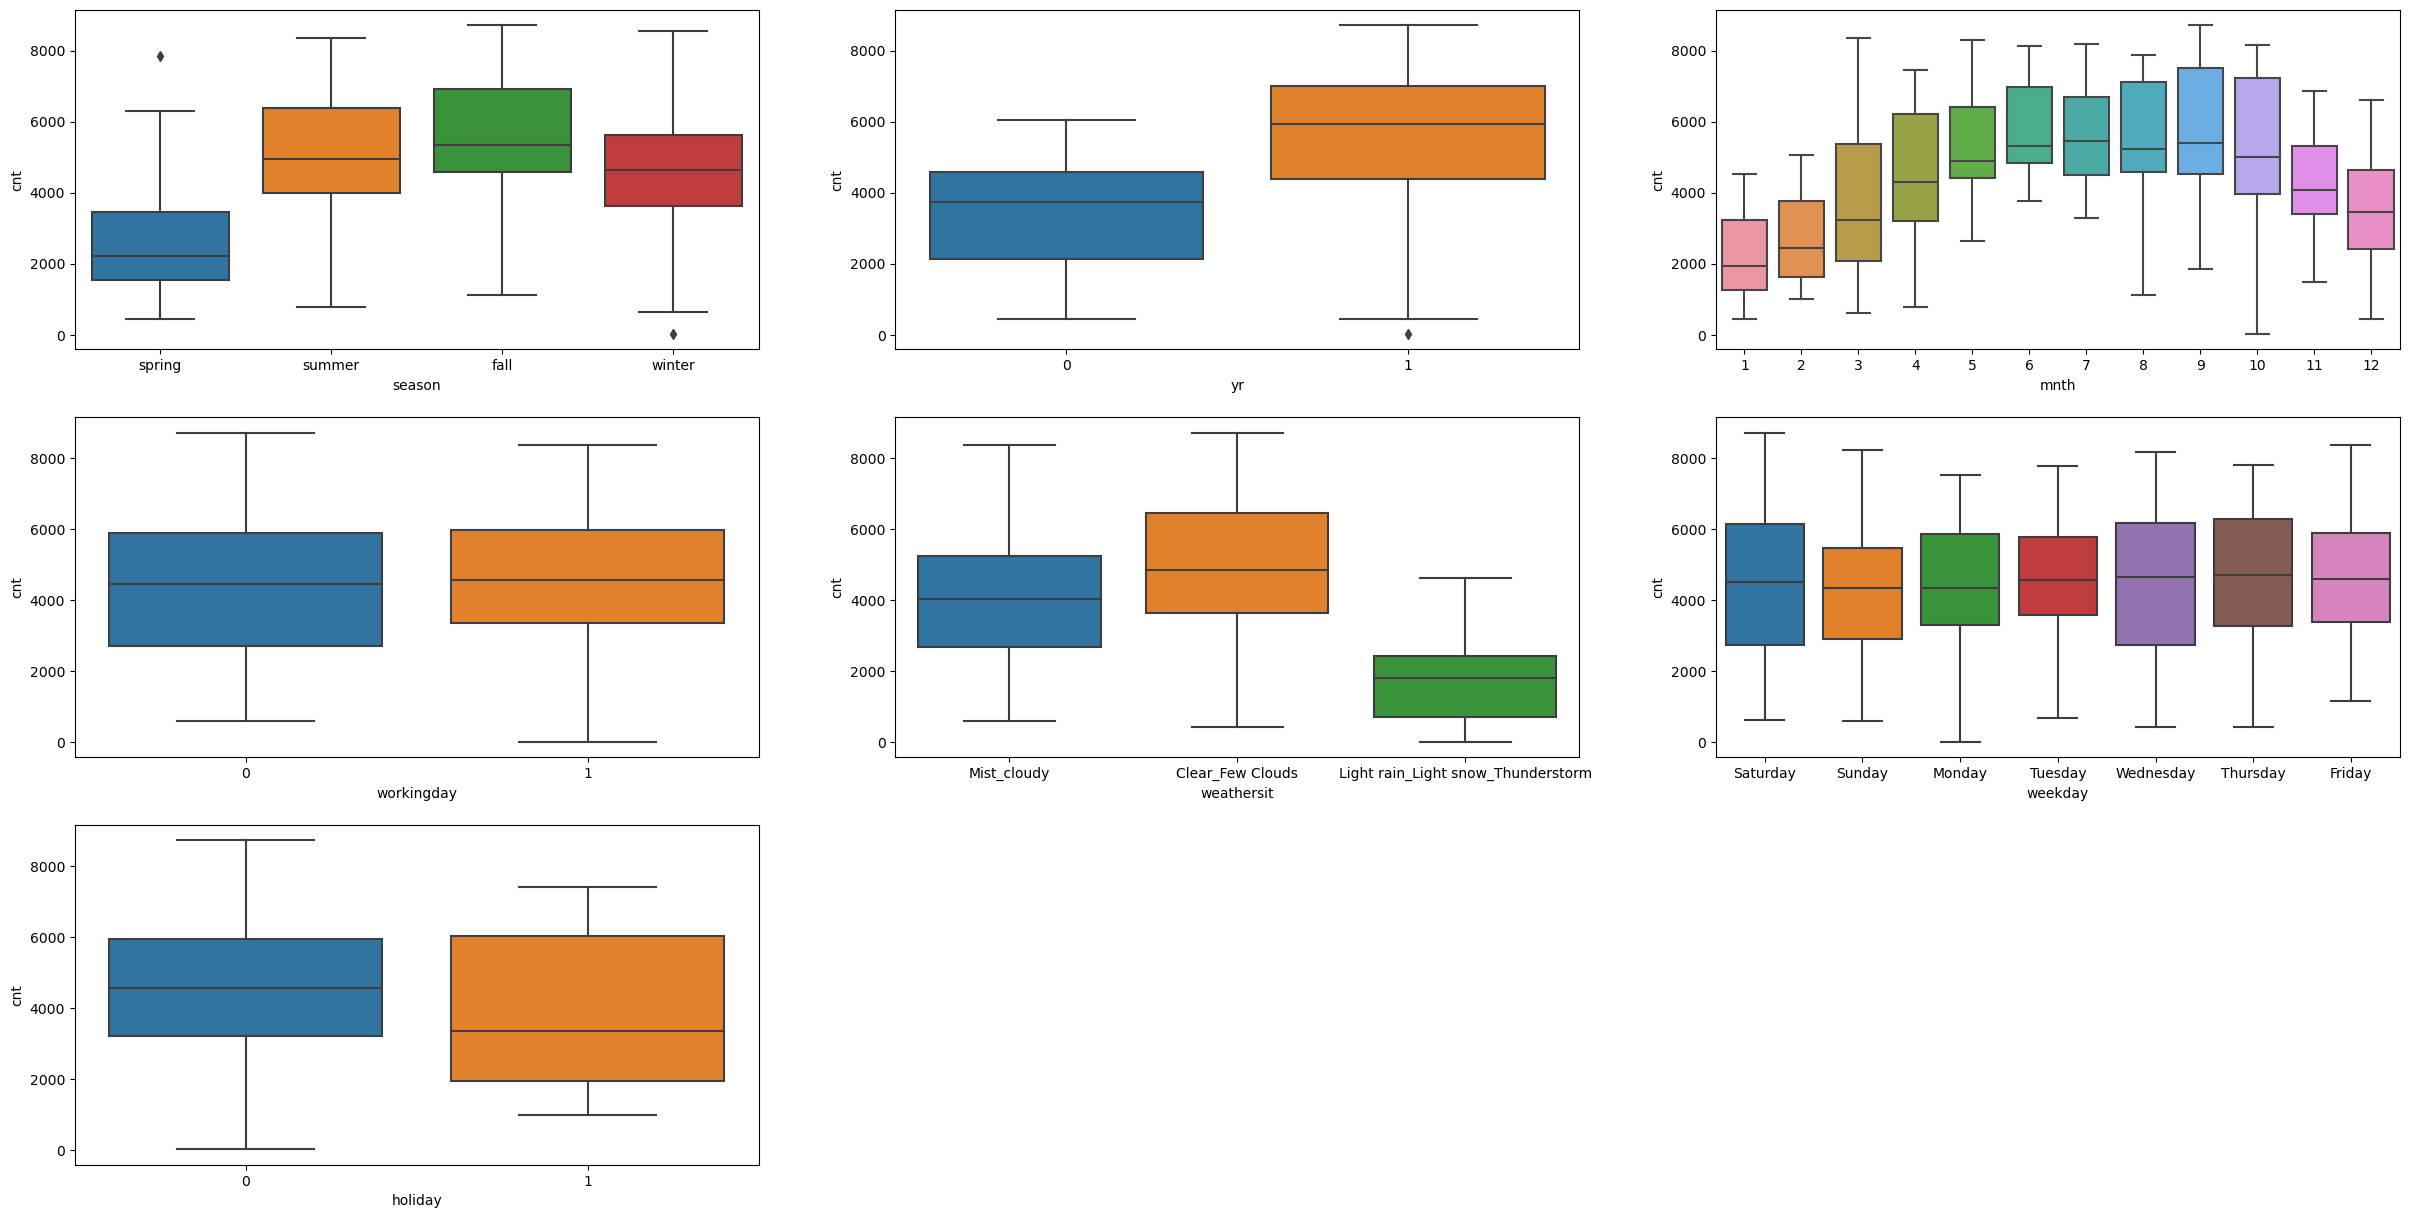

In [24]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

#Creating dummy variables
bike.info()

In [25]:
#Convert variables to object type
bike['mnth']=bike['mnth'].astype(object)
bike['season']=bike['season'].astype(object)
bike['weathersit']=bike['weathersit'].astype(object)
bike['weekday']=bike['weekday'].astype(object)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [26]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_condition=pd.get_dummies(bike['season'],drop_first=True)
Weather_condition=pd.get_dummies(bike['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(bike['weekday'],drop_first=True)
Month=pd.get_dummies(bike['mnth'],drop_first=True)

In [27]:
bike=pd.concat([bike,Season_condition],axis=1)
bike=pd.concat([bike,Weather_condition],axis=1)
bike=pd.concat([bike,Day_of_week],axis=1)
bike=pd.concat([bike,Month],axis=1)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [28]:
#Deleting the orginal columns season.weathersit,weekday,mnth
bike.drop(['season'],axis=1,inplace=True)
bike.drop(['weathersit'],axis=1,inplace=True)

bike.drop(['weekday'],axis=1,inplace=True)

bike.drop(['mnth'],axis=1,inplace=True)


bike.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#Now are data is ready to split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [32]:
bike_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [33]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [34]:
num_vars=['atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [35]:
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [36]:
bike_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
#CREATING X AND Y
y_train = bike_train.pop('cnt')
X_train = bike_train

In [38]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [39]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
#USING RFE APPROACH FOR FEATURE SELECTION
# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X, y = make_friedman1(n_samples=50, n_features=28, random_state=0)
estimator=LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_

array([False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False])

In [42]:
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('yr', False, 3),
 ('holiday', True, 1),
 ('workingday', False, 19),
 ('atemp', True, 1),
 ('hum', False, 6),
 ('windspeed', True, 1),
 ('spring', False, 13),
 ('summer', False, 24),
 ('winter', False, 11),
 ('Light rain_Light snow_Thunderstorm', False, 9),
 ('Mist_cloudy', False, 20),
 ('Monday', False, 18),
 ('Saturday', False, 4),
 ('Sunday', False, 23),
 ('Thursday', False, 12),
 ('Tuesday', True, 1),
 ('Wednesday', False, 2),
 (2, False, 14),
 (3, False, 21),
 (4, True, 1),
 (5, False, 22),
 (6, False, 16),
 (7, False, 17),
 (8, False, 8),
 (9, False, 5),
 (10, False, 7),
 (11, False, 10),
 (12, False, 15)]

In [43]:
col = X_train.columns[selector.support_]
col

Index(['holiday', 'atemp', 'windspeed', 'Tuesday', 4], dtype='object')

In [44]:
X_train.columns[~selector.support_]

Index([                                'yr',
                               'workingday',
                                      'hum',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                'Wednesday',
                                          2,
                                          3,
                                          5,
                                          6,
                                          7,
                                          8,
                                          9,
                                         10,
                                         11,
          

In [45]:
X_train_rfe = X_train[col]

In [46]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [47]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [48]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     78.97
Date:                Thu, 04 May 2023   Prob (F-statistic):           4.30e-61
Time:                        17:30:28   Log-Likelihood:                 186.04
No. Observations:                 510   AIC:                            -360.1
Df Residuals:                     504   BIC:                            -334.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2327      0.027      8.581      0.0

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.71
1,atemp,2.62
3,Tuesday,1.15
4,4,1.12
0,holiday,1.03


In [50]:
X_train_rfe1.head()

,const,holiday,atemp,windspeed,Tuesday,4
653,1.0,0,0.501133,0.300794,1,0
576,1.0,0,0.766351,0.264686,1,0
426,1.0,0,0.438975,0.255342,0,0
728,1.0,0,0.200348,0.663106,0,0
482,1.0,0,0.391735,0.188475,0,1


In [51]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [52]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [53]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     78.97
Date:                Thu, 04 May 2023   Prob (F-statistic):           4.30e-61
Time:                        17:30:29   Log-Likelihood:                 186.04
No. Observations:                 510   AIC:                            -360.1
Df Residuals:                     504   BIC:                            -334.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2327      0.027      8.581      0.0

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.71
1,atemp,2.62
3,Tuesday,1.15
4,4,1.12
0,holiday,1.03


In [55]:
#COLUMN temp HAS A VERY HIGH VIF SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [56]:
 X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     10.72
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.38e-08
Time:                        17:30:29   Log-Likelihood:                 59.300
No. Observations:                 510   AIC:                            -108.6
Df Residuals:                     505   BIC:                            -87.43
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6227      0.021     29.763      0.0

In [57]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,1.26
2,Tuesday,1.12
3,4,1.12
0,holiday,1.03


In [58]:
X_train_rfe.columns

Index(['holiday', 'windspeed', 'Tuesday', 4], dtype='object')

In [59]:
#Windspeed has high VIF >2 so we drop it
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [60]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.770
Date:                Thu, 04 May 2023   Prob (F-statistic):              0.152
Time:                        17:30:29   Log-Likelihood:                 41.172
No. Observations:                 510   AIC:                            -74.34
Df Residuals:                     506   BIC:                            -57.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5133      0.011     45.951      0.0

In [61]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.770
Date:                Thu, 04 May 2023   Prob (F-statistic):              0.152
Time:                        17:30:29   Log-Likelihood:                 41.172
No. Observations:                 510   AIC:                            -74.34
Df Residuals:                     506   BIC:                            -57.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5133      0.011     45.951      0.0

In [62]:
#cOLUMN 4 HAS A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [63]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.529
Date:                Thu, 04 May 2023   Prob (F-statistic):             0.0807
Time:                        17:30:29   Log-Likelihood:                 41.042
No. Observations:                 510   AIC:                            -76.08
Df Residuals:                     507   BIC:                            -63.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5148      0.011     47.672      0.0

In [64]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,holiday,1.0
1,Tuesday,1.0


In [65]:
#ADDING SATURDAY AND CHECKING IF MODEL IMPROVES

X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,holiday,Tuesday,Saturday
653,0,1,0
576,0,1,0
426,0,0,1
728,0,0,0
482,0,0,1


In [66]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.743
Date:                Thu, 04 May 2023   Prob (F-statistic):              0.157
Time:                        17:30:29   Log-Likelihood:                 41.132
No. Observations:                 510   AIC:                            -74.26
Df Residuals:                     506   BIC:                            -57.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5170      0.012     43.217      0.0

In [67]:
#Saturday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [68]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.529
Date:                Thu, 04 May 2023   Prob (F-statistic):             0.0807
Time:                        17:30:29   Log-Likelihood:                 41.042
No. Observations:                 510   AIC:                            -76.08
Df Residuals:                     507   BIC:                            -63.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5148      0.011     47.672      0.0

In [69]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,holiday,1.0
1,Tuesday,1.0


In [70]:
#ADDING SUNDAY TO CHECK IF MODEL IMPROVES
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,holiday,Tuesday,Sunday
653,0,1,0
576,0,1,0
426,0,0,0
728,0,0,1
482,0,0,0


In [71]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.448
Date:                Thu, 04 May 2023   Prob (F-statistic):             0.0630
Time:                        17:30:30   Log-Likelihood:                 42.185
No. Observations:                 510   AIC:                            -76.37
Df Residuals:                     506   BIC:                            -59.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5221      0.012     44.113      0.0

In [72]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,holiday,1.0
1,Tuesday,1.0
2,Sunday,1.0


In [73]:
#ADDING WORKING DAY TO CHECK IF MODEL IMPROVES
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,holiday,Tuesday,Sunday,workingday
653,0,1,0,1
576,0,1,0,1
426,0,0,0,0
728,0,0,1,0
482,0,0,0,0


In [74]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.981
Date:                Thu, 04 May 2023   Prob (F-statistic):             0.0961
Time:                        17:30:30   Log-Likelihood:                 42.481
No. Observations:                 510   AIC:                            -74.96
Df Residuals:                     505   BIC:                            -53.79
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5051      0.025     20.067      0.0

In [75]:
#working has very high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [76]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.448
Date:                Thu, 04 May 2023   Prob (F-statistic):             0.0630
Time:                        17:30:30   Log-Likelihood:                 42.185
No. Observations:                 510   AIC:                            -76.37
Df Residuals:                     506   BIC:                            -59.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5221      0.012     44.113      0.0

In [77]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,holiday,1.0
1,Tuesday,1.0
2,Sunday,1.0


In [78]:
#ADDING MONTH 2 TO CHECK IF MODEL IMPROVES
X_train_rfe[2]=X_train[2]
X_train_rfe.head()

,holiday,Tuesday,Sunday,2
653,0,1,0,0
576,0,1,0,0
426,0,0,0,0
728,0,0,1,0
482,0,0,0,0


In [79]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     11.60
Date:                Thu, 04 May 2023   Prob (F-statistic):           5.11e-09
Time:                        17:30:30   Log-Likelihood:                 60.925
No. Observations:                 510   AIC:                            -111.8
Df Residuals:                     505   BIC:                            -90.68
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5355      0.012     46.077      0.0

In [80]:
#MONTH 2 has very high p-value so we drop it
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [81]:

X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.448
Date:                Thu, 04 May 2023   Prob (F-statistic):             0.0630
Time:                        17:30:30   Log-Likelihood:                 42.185
No. Observations:                 510   AIC:                            -76.37
Df Residuals:                     506   BIC:                            -59.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5221      0.012     44.113      0.0

In [82]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,holiday,1.0
1,Tuesday,1.0
2,Sunday,1.0


In [83]:
#ADDING MONTH 7 TO CHECK IF MODEL IMPROVES
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

,holiday,Tuesday,Sunday,7
653,0,1,0,0
576,0,1,0,1
426,0,0,0,0
728,0,0,1,0
482,0,0,0,0


In [84]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     5.031
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000554
Time:                        17:30:30   Log-Likelihood:                 48.474
No. Observations:                 510   AIC:                            -86.95
Df Residuals:                     505   BIC:                            -65.78
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5129      0.012     42.798      0.0

In [85]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,7,1.04
1,Tuesday,1.02
2,Sunday,1.02
0,holiday,1.00


In [86]:
#MODEL HAS IMPROVED SO WE KEEP MONTH 7

In [87]:
#ADDING MONTH 10 TO CHECK IF MODEL IMPROVES
X_train_rfe[10]=X_train[10]
X_train_rfe.head()

,holiday,Tuesday,Sunday,7,10
653,0,1,0,0,1
576,0,1,0,1,0
426,0,0,0,0,0
728,0,0,1,0,0
482,0,0,0,0,0


In [88]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.778
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000282
Time:                        17:30:30   Log-Likelihood:                 50.320
No. Observations:                 510   AIC:                            -88.64
Df Residuals:                     504   BIC:                            -63.23
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5072      0.012     41.174      0.0

In [89]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Sunday,1.05
3,7,1.04
4,10,1.04
1,Tuesday,1.03
0,holiday,1.00


In [90]:
#MODEL HAS IMPROVED SO WE KEEP MONTH 10

In [91]:
#ADDING MONTH 11 TO CHECK IF MODEL IMPROVES
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

,holiday,Tuesday,Sunday,7,10,11
653,0,1,0,0,1,0
576,0,1,0,1,0,0
426,0,0,0,0,0,0
728,0,0,1,0,0,0
482,0,0,0,0,0,0


In [92]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.990
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000651
Time:                        17:30:31   Log-Likelihood:                 50.366
No. Observations:                 510   AIC:                            -86.73
Df Residuals:                     503   BIC:                            -57.09
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5082      0.013     39.883      0.0

In [93]:
#We can see high p-value for 11 so we drop it
X_train_rfe=X_train_rfe.drop([11],axis=1)

In [94]:

X_train_rfe16= sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.778
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000282
Time:                        17:30:31   Log-Likelihood:                 50.320
No. Observations:                 510   AIC:                            -88.64
Df Residuals:                     504   BIC:                            -63.23
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5072      0.012     41.174      0.0

In [95]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Sunday,1.05
3,7,1.04
4,10,1.04
1,Tuesday,1.03
0,holiday,1.00


In [96]:
#ADDING MONTH 12 TO SEE MODEL IMPROVES
X_train_rfe[12]=X_train[12]
X_train_rfe.head()

,holiday,Tuesday,Sunday,7,10,12
653,0,1,0,0,1,0
576,0,1,0,1,0,0
426,0,0,0,0,0,0
728,0,0,1,0,0,1
482,0,0,0,0,0,0


In [97]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     5.390
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.06e-05
Time:                        17:30:31   Log-Likelihood:                 54.400
No. Observations:                 510   AIC:                            -94.80
Df Residuals:                     503   BIC:                            -65.16
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5180      0.013     40.456      0.0

In [98]:
#We see high p-value for 12 so we drop it

X_train_rfe=X_train_rfe.drop([12],axis=1)

In [99]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.778
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000282
Time:                        17:30:31   Log-Likelihood:                 50.320
No. Observations:                 510   AIC:                            -88.64
Df Residuals:                     504   BIC:                            -63.23
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5072      0.012     41.174      0.0

In [100]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Sunday,1.05
3,7,1.04
4,10,1.04
1,Tuesday,1.03
0,holiday,1.00


In [101]:
#ADDING MONDAY TO SEE MODEL IMPROVES
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

,holiday,Tuesday,Sunday,7,10,Monday
653,0,1,0,0,1,0
576,0,1,0,1,0,0
426,0,0,0,0,0,0
728,0,0,1,0,0,0
482,0,0,0,0,0,0


In [102]:
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.976
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000673
Time:                        17:30:31   Log-Likelihood:                 50.327
No. Observations:                 510   AIC:                            -86.65
Df Residuals:                     503   BIC:                            -57.01
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5066      0.013     37.676      0.0

In [103]:
# We see high p-value for Monday so we drop it
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [104]:
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe20).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.778
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000282
Time:                        17:30:31   Log-Likelihood:                 50.320
No. Observations:                 510   AIC:                            -88.64
Df Residuals:                     504   BIC:                            -63.23
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5072      0.012     41.174      0.0

In [105]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Sunday,1.05
3,7,1.04
4,10,1.04
1,Tuesday,1.03
0,holiday,1.00


In [106]:
#ADDING TUESDAY TO SEE MODEL IMPROVES
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()


,holiday,Tuesday,Sunday,7,10
653,0,1,0,0,1
576,0,1,0,1,0
426,0,0,0,0,0
728,0,0,1,0,0
482,0,0,0,0,0


In [107]:
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
print(lm21.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.778
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000282
Time:                        17:30:31   Log-Likelihood:                 50.320
No. Observations:                 510   AIC:                            -88.64
Df Residuals:                     504   BIC:                            -63.23
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5072      0.012     41.174      0.0

In [108]:
# WE SEE HIGH P-VALUE FOR TUESDAY SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)


In [109]:
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe22).fit()
print(lm22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     5.979
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000105
Time:                        17:30:31   Log-Likelihood:                 50.308
No. Observations:                 510   AIC:                            -90.62
Df Residuals:                     505   BIC:                            -69.44
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5079      0.011     44.290      0.0

In [110]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Sunday,1.04
3,10,1.03
2,7,1.02
0,holiday,1.00


In [111]:
#ADDING WEDNESDAY TO SEE MODEL IMPROVES
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,holiday,Sunday,7,10,Wednesday
653,0,0,0,1,0
576,0,0,1,0,0
426,0,0,0,0,0
728,0,1,0,0,0
482,0,0,0,0,0


In [112]:
X_train_rfe23 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe23).fit()
print(lm23.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.794
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000272
Time:                        17:30:32   Log-Likelihood:                 50.359
No. Observations:                 510   AIC:                            -88.72
Df Residuals:                     504   BIC:                            -63.31
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5062      0.013     39.944      0.0

In [113]:
#High p-value for Wednesday so we drop it

X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [114]:
X_train_rfe24 = sm.add_constant(X_train_rfe)
lm24 = sm.OLS(y_train,X_train_rfe24).fit()
print(lm24.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     5.979
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000105
Time:                        17:30:32   Log-Likelihood:                 50.308
No. Observations:                 510   AIC:                            -90.62
Df Residuals:                     505   BIC:                            -69.44
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5079      0.011     44.290      0.0

In [115]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Sunday,1.04
3,10,1.03
2,7,1.02
0,holiday,1.00


In [116]:
#ADDING THURSDAY TO SEE MODEL IMPROVES
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,holiday,Sunday,7,10,Thursday
653,0,0,0,1,0
576,0,0,1,0,0
426,0,0,0,0,0
728,0,1,0,0,0
482,0,0,0,0,0


In [117]:
X_train_rfe25 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe25).fit()
print(lm25.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.779
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000281
Time:                        17:30:32   Log-Likelihood:                 50.322
No. Observations:                 510   AIC:                            -88.64
Df Residuals:                     504   BIC:                            -63.24
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5071      0.012     40.808      0.0

In [118]:
# High p- value for Thursday so we drop it
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

In [119]:
X_train_rfe26 = sm.add_constant(X_train_rfe)
lm26 = sm.OLS(y_train,X_train_rfe26).fit()
print(lm26.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     5.979
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000105
Time:                        17:30:32   Log-Likelihood:                 50.308
No. Observations:                 510   AIC:                            -90.62
Df Residuals:                     505   BIC:                            -69.44
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5079      0.011     44.290      0.0

In [120]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Sunday,1.04
3,10,1.03
2,7,1.02
0,holiday,1.00


### We have reviewed and taken into account each column.Now that the model is complete, we check to see which model we can use.
### Model lm14 was chosen because, out of all the models, it appears to provide good results.

In [121]:
#Predict values
y_train_cnt = lm14.predict(X_train_rfe14)

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
#CALCULATING RESIDUALS

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

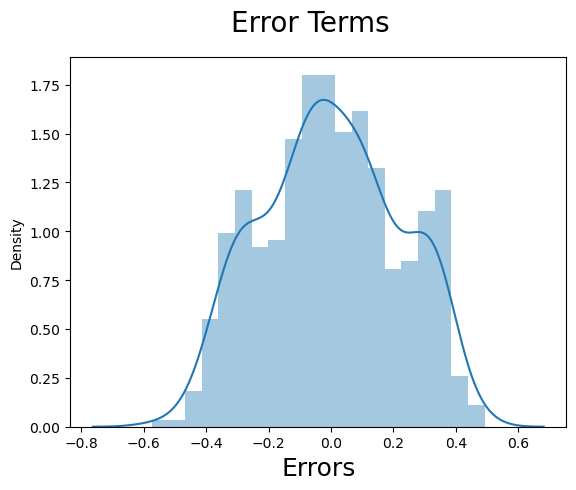

In [124]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [125]:
#Checking columns
X_train_rfe14.columns

Index(['const', 'holiday', 'Tuesday', 'Sunday', 7, 10], dtype='object')

In [126]:
print(X_train_rfe14.shape)
print(res.shape)

(510, 6)
(510,)


In [127]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])

In [128]:
#Creating x and y sets

y_test = bike_test.pop('cnt')
X_test = bike_test

In [129]:
X_train_new=X_train_rfe14.drop(['const'], axis=1)

In [130]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [131]:
X_train_rfe14.columns

Index(['const', 'holiday', 'Tuesday', 'Sunday', 7, 10], dtype='object')

In [132]:
#Making predictions on the chosen model

y_pred = lm14.predict(X_test_new)

Text(0, 0.5, 'y_pred')

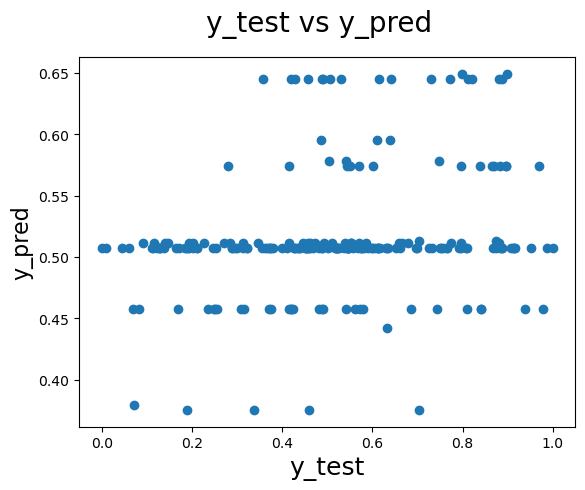

In [133]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

**We have a model that appears to be adequate for forecasting bike demand. The fact that the real and anticipated cnt, or demand, significantly overlapped suggests that the model does a great job of explaining the change in demand.**


In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [135]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.23077608670531377

In [136]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.061016273195451776

In [137]:
#R square of our model is 79.7

In [138]:
X_t=X_train_new.iloc[:,0].values

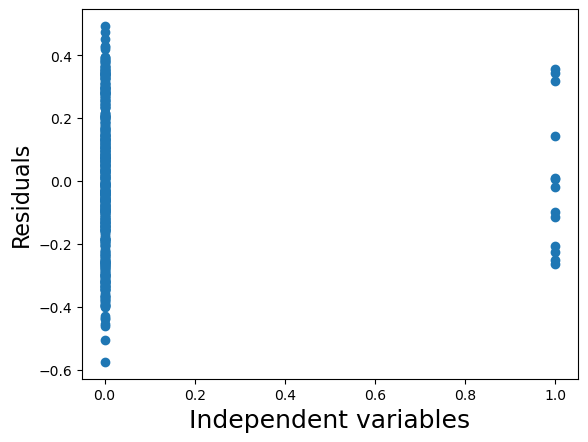

In [139]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

**Regression is likely to experience autocorrelation when we have time series data (such as annual data), as demand for the following year will undoubtedly depend on demand for the current year. Error terms in several observations will therefore undoubtedly be associated with one another.**

In [140]:
X_train_new.head()

,holiday,Tuesday,Sunday,7,10
653,0,1,0,0,1
576,0,1,0,1,0
426,0,0,0,0,0
728,0,0,1,0,0
482,0,0,0,0,0


In [141]:
print(X_train_rfe14.columns)
print(lm14.summary())

Index(['const', 'holiday', 'Tuesday', 'Sunday', 7, 10], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.778
Date:                Thu, 04 May 2023   Prob (F-statistic):           0.000282
Time:                        17:30:34   Log-Likelihood:                 50.320
No. Observations:                 510   AIC:                            -88.64
Df Residuals:                     504   BIC:                            -63.23
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

### It is evident that the formula for the best-fit line is:

**cnt= 0.246 X yr - 0.083 X holiday -  0.198 X Spring - 0.321 X Light rain_Light snow_Thunderstorm - 0.090 X Mist_Cloudy +0.063 X 3 + 0.123  X 5 +0.148 X 6 +0.153 X 8 + 0.193 X 9 -0.049 X Sunday + 0.126 X 7 + 0.116 X 10**

**We can observe that the factors listed below have a significant impact on bike demand:**
**yr , holiday ,Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm,3 ,5 ,6, 8, 9, sunday, 7, 10**

**Demands increases in the month of  3, 5, 6, 8 ,9, 7 , 10  and yr**
**Demand decreases if it is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy, Sunday**

## Final recommendations for the company:

**Demand is higher in month of 3, 5 , 6, 8, 9 ,7  and 10**